In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 30
A = np.array([[-1, 0.4, 0.8], [1, 0, 0], [0, 1, 0]])
b = np.array([1, 0, 0.3])
x_des = np.array([7, 2, -6])

In [3]:
t = cp.Variable(N)
u = cp.Variable(N)
ones = np.ones(N)

W = []
for i in range(N):
    W.append(np.linalg.matrix_power(A,N-i-1).dot(b))
W = np.array(W)

W_u = 0
for i, u_i in enumerate(u):
    W_u += u_i * W[i]

constraints = []
for u_i, t_i in zip(u,t):
    constraints.append(u_i - t_i <= 0)
    constraints.append(u_i + t_i >= 0)
    constraints.append(u_i - (t_i+1)/2 <= 0)
    constraints.append(u_i + (t_i+1)/2 >= 0)


constraints.append(W_u - x_des == 0)
obj = cp.Minimize(ones.T@t)
prob = cp.Problem(obj, constraints)
prob.solve()

17.323567853890705

In [4]:
print("P* =", prob.value)
print("u* =", u.value)

P* = 17.323567853890705
u* = [ 1.90484157e-11  2.85093333e-11 -1.33009137e-09  1.00000000e+00
 -1.00000000e+00  1.00000000e+00 -7.15566671e-11  1.11115171e-12
  6.28083175e-11 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
  2.46624155e-01 -2.63174950e-11 -1.31684321e-11  1.71348204e-10
 -1.00000000e+00  1.00000000e+00 -1.00000000e+00  1.51411689e-10
 -1.60565826e-12 -2.08203544e-11  1.00000000e+00 -6.98881473e-01
  1.00000000e+00 -5.40961692e-11  1.43772480e-09  8.45166018e-11
  2.62796258e-12  3.18903111e+00]


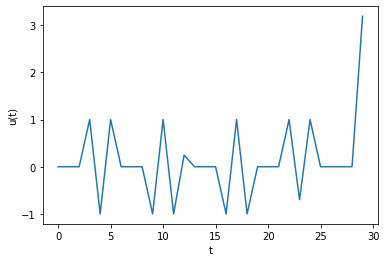

In [5]:
plt.ylabel("u(t)")
plt.xlabel("t")
plt.plot(u.value)
plt.show()